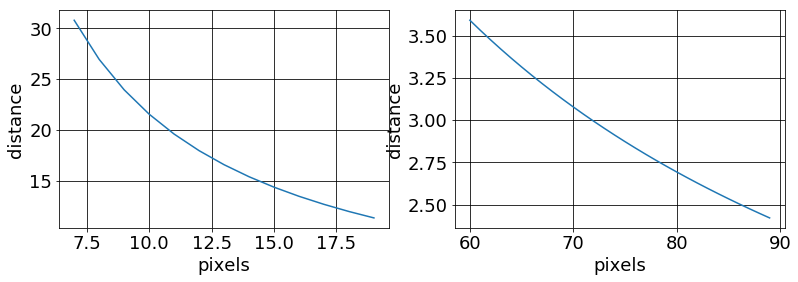

In [80]:
# 1ピクセルのズレでどれだけ距離が変化するか
import matplotlib.pyplot as plt
import numpy as np

fig, axes = plt.subplots(1, 2, figsize=(13, 4))

pixels_small = np.arange(7, 20, 1)
dist_far = (135*3.99) / (pixels_small * 2.5)
axes[0].plot(pixels_small, dist_far)
axes[0].set_xlabel('pixels')
axes[0].set_ylabel('distance')
axes[0].grid(color='black',linestyle='-')

pixels_big = np.arange(60, 90, 1)
dist_near = (135*3.99) / (pixels_big * 2.5)
axes[1].plot(pixels_big, dist_near)
axes[1].set_xlabel('pixels')
axes[1].set_ylabel('distance')
axes[1].grid(color='black', linestyle='-')

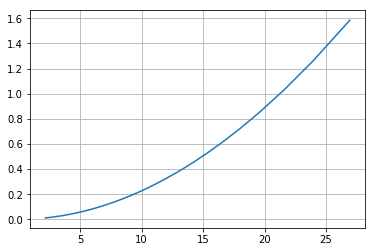

In [2]:
# 距離ごとの量子化誤差
import matplotlib.pyplot as plt
import numpy as np

pixels = np.arange(8, 100, 1)
distance = (135*3.99) / (pixels * 2.5)
quant_error = ((135*3.99) / (pixels * 2.5)) - ((135*3.99) / ((pixels + 0.5) * 2.5))
plt.grid()
plt.plot(distance, quant_error)

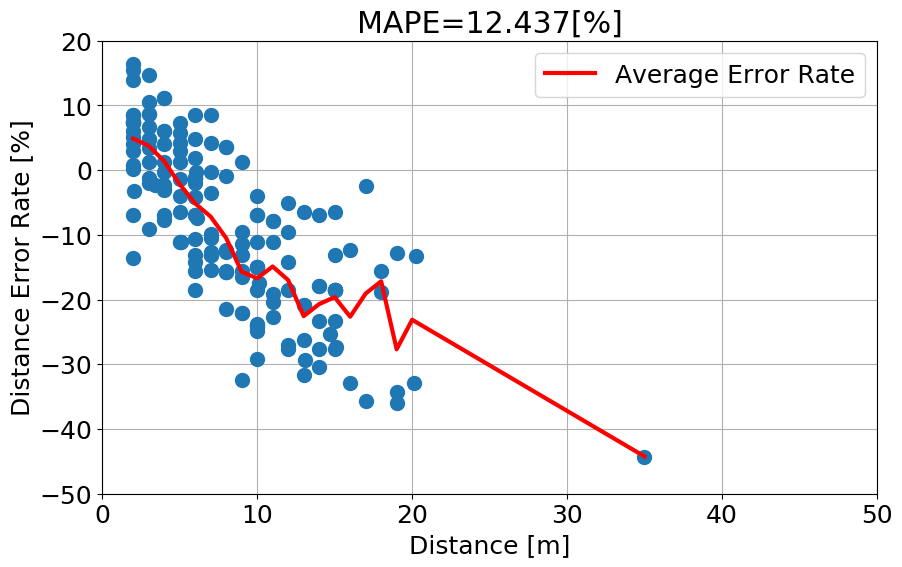

In [4]:
# 距離誤差率
import matplotlib.pyplot as plt
import numpy as np

path = '/Users/funatsutakeshi/Desktop/tokken/data/distance/'

with open(path + 'dist_np.dat') as file:
    data_list = [s.strip() for s in file.readlines()]

# 誤差率生データ
title = data_list.pop(0)
real = []
error = []
for data in data_list:
    dist = data.split(' ')
    if not dist[1] == "false":
        real.append(float(dist[0]))
        error.append( 100 * (float(dist[1])-float(dist[0]) ) / float(dist[0]) )
        
# 誤差率平均(準備)
err_sum = {}
err_cnt = {}
for data in data_list:
    dist = data.split(' ')
    if not dist[1] == "false":
        the_dist = round(float(dist[0]))
        err_rate = 100 * (float(dist[1])-float(dist[0]) ) / float(dist[0])
        if not the_dist in err_cnt:
            err_cnt[the_dist] = 1
            err_sum[the_dist] = err_rate
        else:
            err_cnt[the_dist] += 1
            err_sum[the_dist] += err_rate
err_cnt = sorted(err_cnt.items())
err_sum = sorted(err_sum.items())
err_bar = []
idx = []

# 誤差率平均(計算)
for cnt, sum_ in zip(err_cnt, err_sum):
    idx.append(cnt[0])
    err_bar.append(sum_[1] / cnt[1])

# 描画
fig = plt.figure(figsize=(10,6), dpi=100)
plt.rcParams["font.size"] = 18

abs_error = np.abs(np.array(error))
avr_error = np.round(np.sum(abs_error) / len(abs_error), 3)
plt.title('MAPE=' + str(avr_error) + '[%]')
plt.grid()
plt.xlabel('Distance [m]')
plt.ylabel('Distance Error Rate [%]')
plt.xlim(0, 50)
plt.ylim(-50, 20)
plt.plot(real, error, "o", ms=10)
plt.plot(idx, err_bar, linewidth=3, color="red", label="Average Error Rate")
plt.legend()
plt.savefig(path + 'error.png')

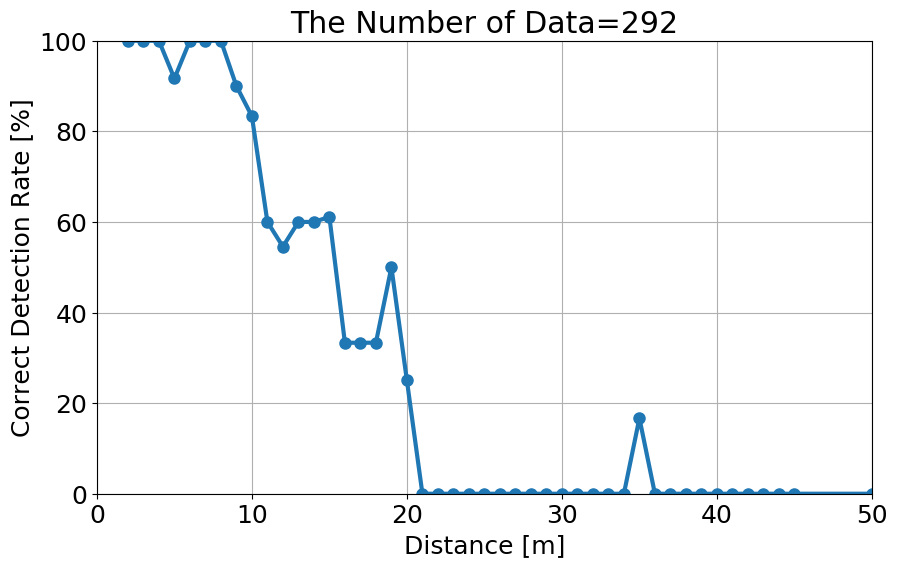

In [2]:
# 距離ごとのnp検出率
import matplotlib.pyplot as plt
import numpy as np

path = '/Users/funatsutakeshi/Desktop/tokken/data/distance/'

with open(path + 'dist_np.dat') as file:
    data_list = [s.strip() for s in file.readlines()]

title = data_list.pop(0)
count = {}
correct_count = {}
for data in data_list:
    dist = data.split(' ')
    the_dist = round(float(dist[0]))
    if the_dist in count:
        count[the_dist] += 1
        if not dist[1] == "false": correct_count[the_dist] += 1
    else:
        count[the_dist] = 1
        if dist[1] == "false": correct_count[the_dist] = 0
        else: correct_count[the_dist] = 1

# 昇順に整列
count = sorted(count.items())
correct_count = sorted(correct_count.items())

dists = []
crrs = []
for cnt, crr in zip(count, correct_count):
    crr_rate = crr[1] * 100 / cnt[1]
    dists.append(cnt[0])
    crrs.append(crr_rate)
                 
fig = plt.figure(figsize=(10,6), dpi=100)
plt.rcParams["font.size"] = 18

plt.title('The Number of Data=292')
plt.grid()
plt.xlabel('Distance [m]')
plt.ylabel('Correct Detection Rate [%]')
plt.xlim(0, 50)
plt.ylim(0, 100)
plt.plot(dists, crrs, marker="o", linewidth=3, ms=8)
plt.savefig(path + 'correct_rate.png')

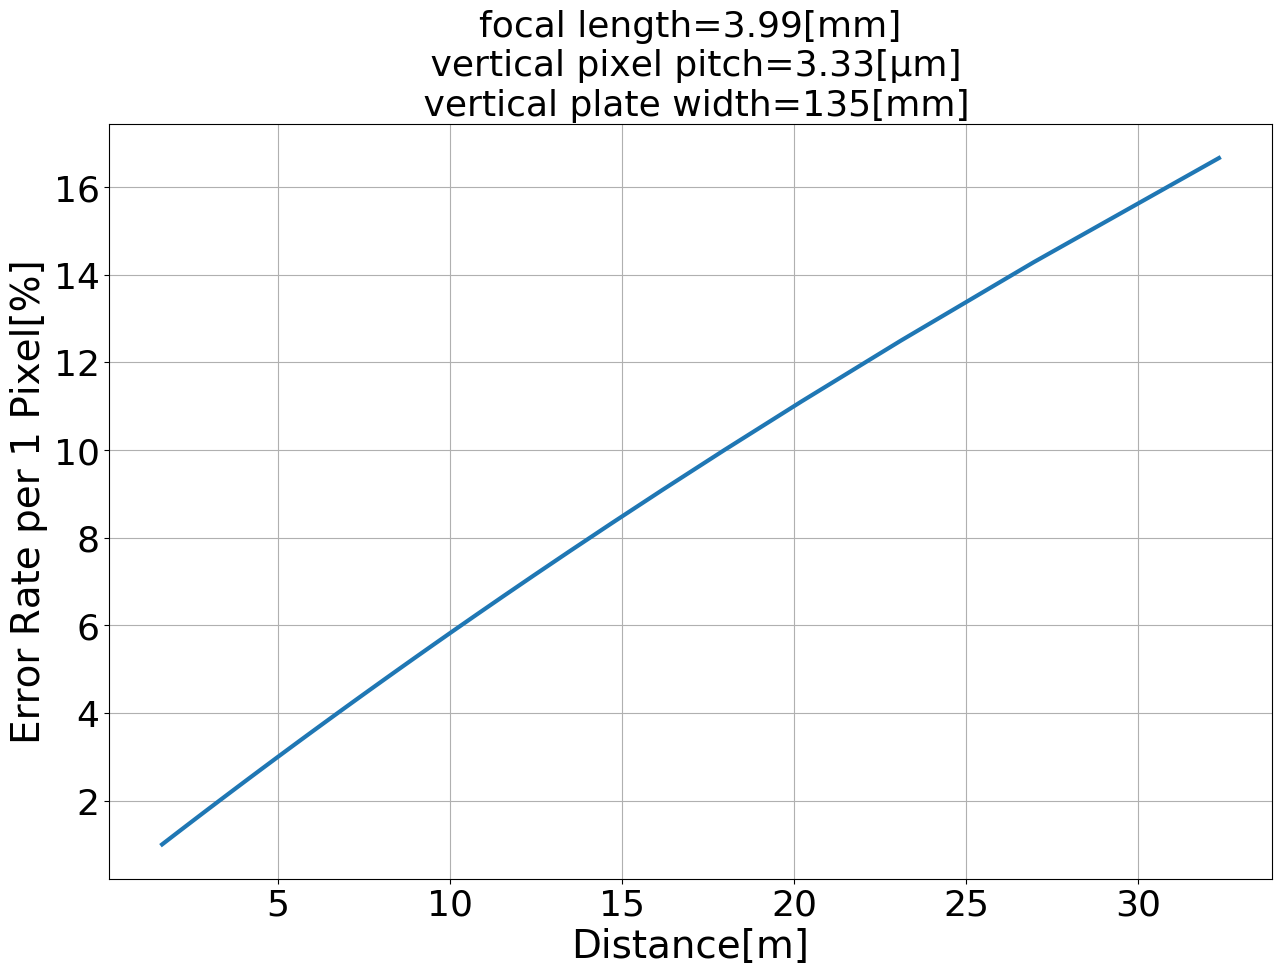

In [144]:
# 1ピクセルズレによる誤差率
import matplotlib.pyplot as plt
import numpy as np

path = '/Users/funatsutakeshi/Desktop/tokken/data/distance/'

pixels_all = np.arange(5, 100, 1)
dists = (135*3.99) / (pixels_all * 3.33)
dist_edge = (135*3.99) / (100*3.33)
err_per_pixels = []
for i in range(len(dists)-1):
    err_per_pixels.append( (dists[i] - dists[i+1])*100 / dists[i])
err_per_pixels.append( ( dists[94] - dist_edge )*100 / dists[94] )

fig = plt.figure(figsize=(15, 10), dpi=100)

plt.title("focal length=3.99[mm]\n vertical pixel pitch=3.33[μm]\n vertical plate width=135[mm]", fontsize=26)
plt.grid()
plt.xlabel('Distance[m]', fontsize=28)
plt.ylabel('Error Rate per 1 Pixel[%]', fontsize=28)
plt.plot(dists, err_per_pixels, linewidth=3)
plt.savefig(path + 'err_rate_per_pixel.png')

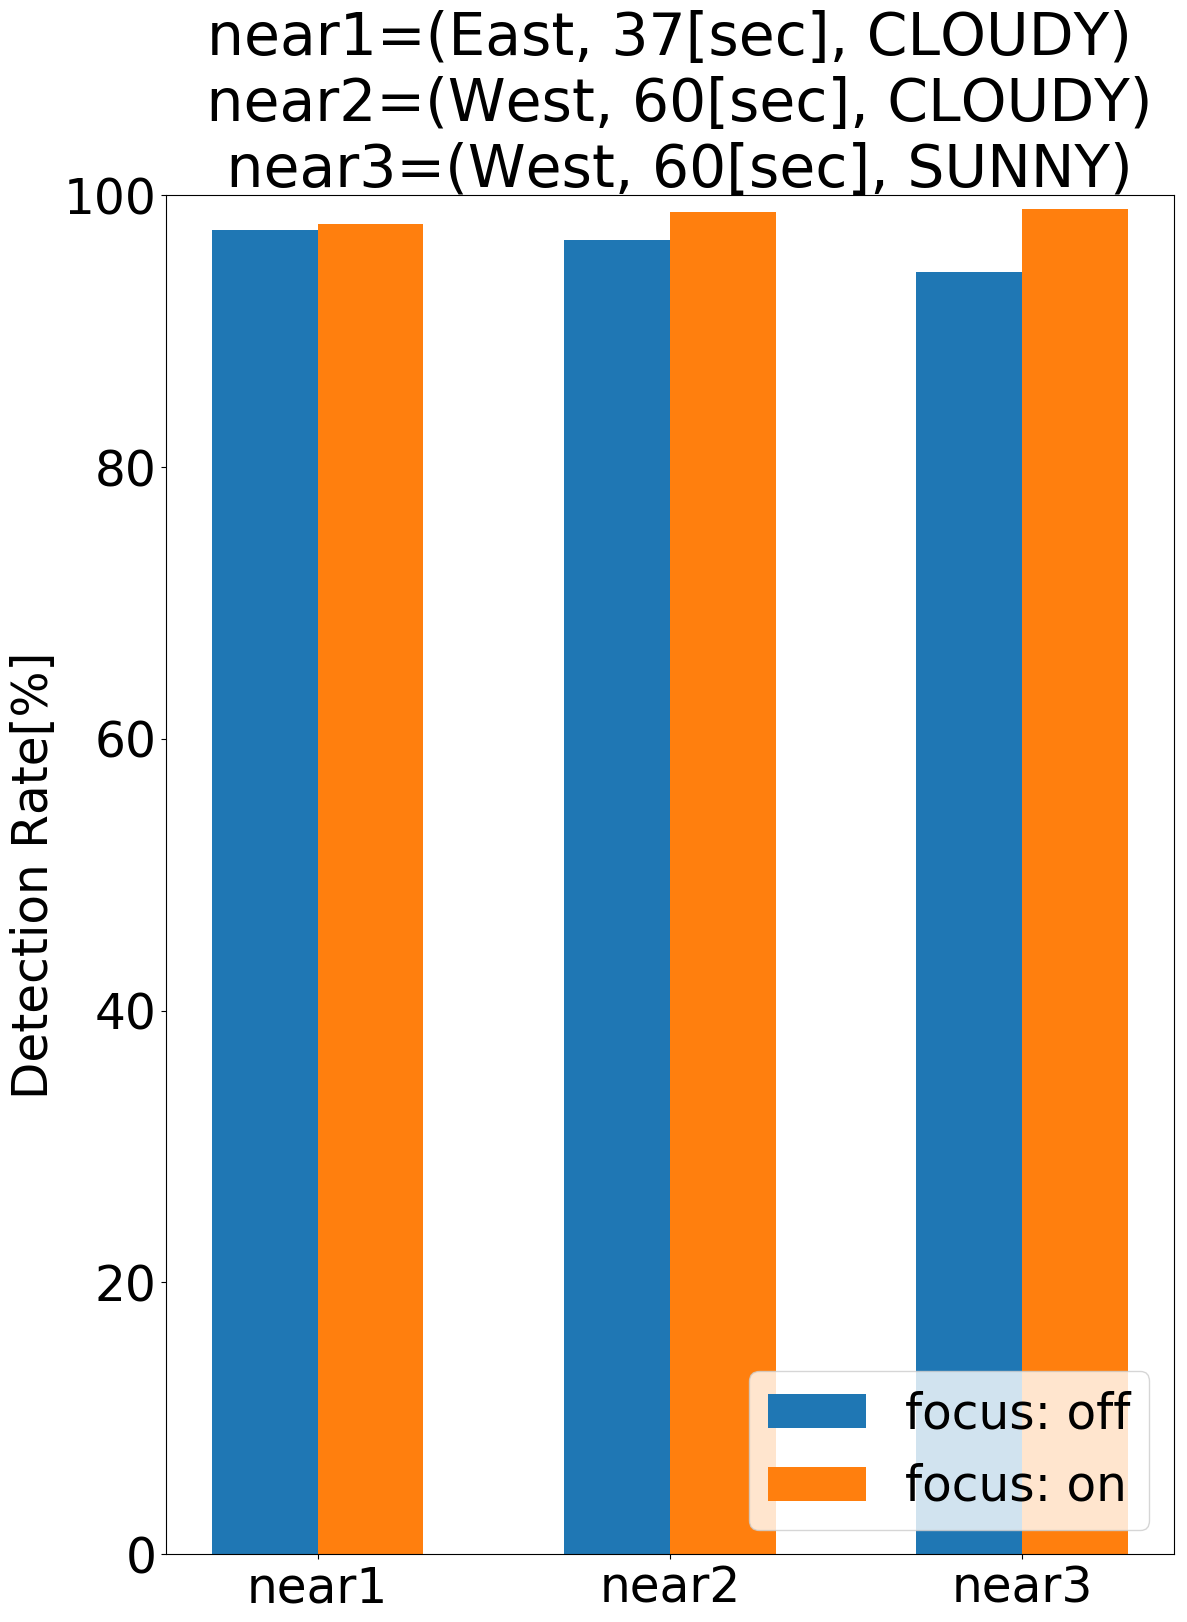

In [2]:
import matplotlib.pyplot as plt
import numpy as np

rabel_near = ['near1', 'near2', 'near3']

xplace1 = [1, 2, 3]
xplace2 = [1.3, 2.3, 3.3]

near = [97.47, 96.71, 94.39]
near_focus = [97.92, 98.77, 99.00]

fig = plt.figure(figsize=(13, 18), dpi=100)
plt.rcParams["font.size"] = 35

plt.bar(xplace1, near, width=0.3, label='focus: off', align='center')
plt.bar(xplace2, near_focus, width=0.3, label='focus: on', align='center')
plt.ylabel('Detection Rate[%]')
plt.ylim(0, 100)
plt.xticks([1.15, 2.15, 3.15], rabel_near)
plt.legend(loc=4)
plt.title("near1=(East, 37[sec], CLOUDY)\n near2=(West, 60[sec], CLOUDY)\n near3=(West, 60[sec], SUNNY)")

plt.savefig('/Users/funatsutakeshi/Desktop/tokken/data/distance/car_detection_rate_near.png')

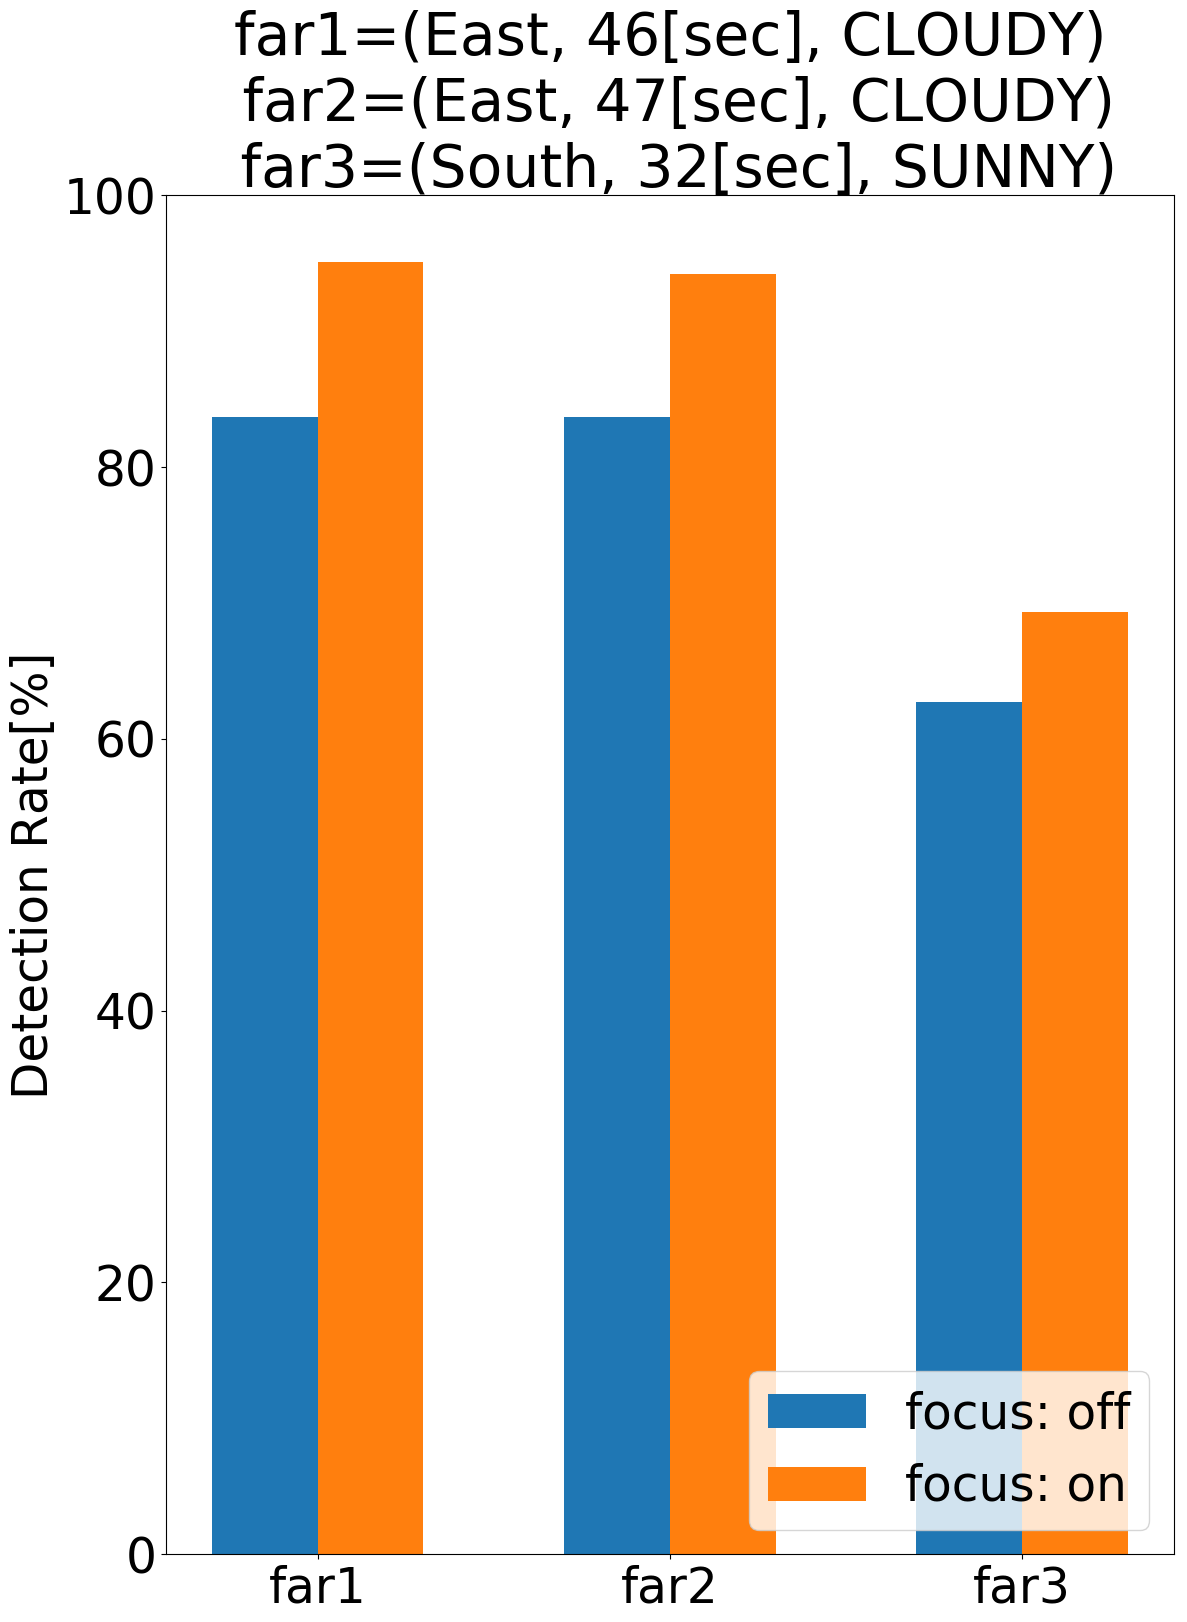

In [3]:
import matplotlib.pyplot as plt
import numpy as np

rabel_far = ['far1', 'far2', 'far3']

xplace1 = [1, 2, 3]
xplace2 = [1.3, 2.3, 3.3]

far = [83.70, 83.68, 62.70]
far_focus = [95.12, 94.23, 69.34]

fig = plt.figure(figsize=(13, 18), dpi=100)
plt.rcParams["font.size"] = 35

plt.bar(xplace1, far, width=0.3, label='focus: off', align='center')
plt.bar(xplace2, far_focus, width=0.3, label='focus: on', align='center')
plt.ylabel('Detection Rate[%]')
plt.ylim(0, 100)
plt.xticks([1.15, 2.15, 3.15], rabel_far)
plt.legend(loc=4)
plt.title("far1=(East, 46[sec], CLOUDY)\n far2=(East, 47[sec], CLOUDY)\n far3=(South, 32[sec], SUNNY)")

plt.savefig('/Users/funatsutakeshi/Desktop/tokken/data/distance/car_detection_rate_far.png')

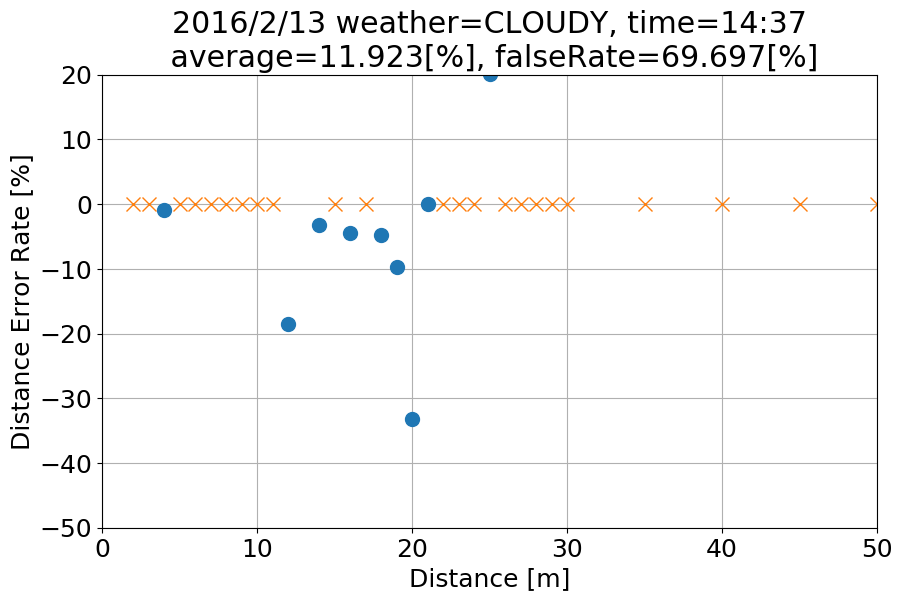

In [33]:
# 距離誤差率
import matplotlib.pyplot as plt
import numpy as np

path = '/Users/funatsutakeshi/Desktop/tokken/data/distance/'

with open(path + 'dist_np.dat') as file:
    data_list = [s.strip() for s in file.readlines()]

# 誤差率生データ
title = data_list.pop(0)
real = []
error = []
falses = []
zeros = []
counta = 0
for data in data_list:
    dist = data.split(' ')
    if not dist[1] == "false":
        real.append(float(dist[0]))
        error.append( 100 * (float(dist[1])-float(dist[0]) ) / float(dist[0]) )
    else: 
        falses.append(float(dist[0]))
        zeros.append(0)
    counta += 1
        

# 描画
fig = plt.figure(figsize=(10,6), dpi=100)
plt.rcParams["font.size"] = 18

abs_error = np.abs(np.array(error))
avr_error = np.round(np.sum(abs_error) / len(abs_error), 3)
falseRate = np.round(len(falses) * 100 / counta, 3)
plt.title(title + "\n average=" + str(avr_error) +"[%], falseRate=" + str(falseRate) + "[%]")
plt.grid()
plt.xlabel('Distance [m]')
plt.ylabel('Distance Error Rate [%]')
plt.xlim(0, 50)
plt.ylim(-50, 20)
plt.plot(real, error, "o", ms=10)
plt.plot(falses, zeros, "x", ms=10)
plt.savefig(path + 'sys_error.png')